In [1]:
import requests

In [2]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/')

In [3]:
response

<Response [200]>

### Step 2: Use requests and BeautifulSoup to make a list of all the CORGIS datasets.



In [4]:
from bs4 import BeautifulSoup

In [5]:
html_string = response.text

In [6]:
document = BeautifulSoup(html_string, "html.parser")

In [7]:
document.find_all('h3')

[<h3>Aids</h3>,
 <h3>Airlines</h3>,
 <h3>Billionaires</h3>,
 <h3>Broadway</h3>,
 <h3>Business Dynamics</h3>,
 <h3>Cancer</h3>,
 <h3>Cars</h3>,
 <h3>Classics</h3>,
 <h3>Construction Permits</h3>,
 <h3>Construction Spending</h3>,
 <h3>County Demographics</h3>,
 <h3>Covid</h3>,
 <h3>Drugs</h3>,
 <h3>Earthquakes</h3>,
 <h3>Election</h3>,
 <h3>Electricity</h3>,
 <h3>Emissions</h3>,
 <h3>Energy</h3>,
 <h3>Finance</h3>,
 <h3>Food</h3>,
 <h3>Food Access</h3>,
 <h3>Global Development</h3>,
 <h3>Graduates</h3>,
 <h3>Health</h3>,
 <h3>Hospitals</h3>,
 <h3>Hydropower</h3>,
 <h3>Ingredients</h3>,
 <h3>Injuries</h3>,
 <h3>Labor</h3>,
 <h3>Medal Of Honor</h3>,
 <h3>Music</h3>,
 <h3>Opioids</h3>,
 <h3>Police Shootings</h3>,
 <h3>Publishers</h3>,
 <h3>Real Estate</h3>,
 <h3>Retail Services</h3>,
 <h3>School Scores</h3>,
 <h3>Skyscrapers</h3>,
 <h3>Slavery</h3>,
 <h3>State Crime</h3>,
 <h3>State Demographics</h3>,
 <h3>State Fragility</h3>,
 <h3>Suicide Attacks</h3>,
 <h3>Supreme Court</h3>,
 <h3>Tate</

In [8]:
corgislist = []
for i in document.find_all("h3"):
    corgislist.append(i.text.strip())


In [9]:
corgislist  #list of all CORGIS datasets

['Aids',
 'Airlines',
 'Billionaires',
 'Broadway',
 'Business Dynamics',
 'Cancer',
 'Cars',
 'Classics',
 'Construction Permits',
 'Construction Spending',
 'County Demographics',
 'Covid',
 'Drugs',
 'Earthquakes',
 'Election',
 'Electricity',
 'Emissions',
 'Energy',
 'Finance',
 'Food',
 'Food Access',
 'Global Development',
 'Graduates',
 'Health',
 'Hospitals',
 'Hydropower',
 'Ingredients',
 'Injuries',
 'Labor',
 'Medal Of Honor',
 'Music',
 'Opioids',
 'Police Shootings',
 'Publishers',
 'Real Estate',
 'Retail Services',
 'School Scores',
 'Skyscrapers',
 'Slavery',
 'State Crime',
 'State Demographics',
 'State Fragility',
 'Suicide Attacks',
 'Supreme Court',
 'Tate',
 'Video Games',
 'Weather',
 'Wind Turbines']

### Step 3: Write a function that takes an element from the list of CORGIS datasets, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe.



In [10]:
import pandas as pd

In [11]:
def corgis(a):
    lower = a.lower() 
    if " " in lower: #for elements that have more than one word (i.e. 'Medal of Honor', 'Supreme Court')
        lower = lower.replace(" ", "_")
        response = requests.get('https://corgis-edu.github.io/corgis/csv/' + lower + '/')
    else:
        response = requests.get('https://corgis-edu.github.io/corgis/csv/' + lower + '/') 
    html_string = response.text
    document = BeautifulSoup(html_string, "html.parser")
    links = document.find_all('a')
    for i in links:
        if i.has_attr('download'):
            download = i['href']
    downloadlink = 'https://corgis-edu.github.io/corgis/csv/' + lower + '/' + download
    corgisdf = pd.read_csv(downloadlink)
    return corgisdf

### Broadway Dataset

In [12]:
broadway_df = corgis('Broadway')
broadway_df.columns


Index(['Date.Day', 'Date.Full', 'Date.Month', 'Date.Year', 'Show.Name',
       'Show.Theatre', 'Show.Type', 'Statistics.Attendance',
       'Statistics.Capacity', 'Statistics.Gross', 'Statistics.Gross Potential',
       'Statistics.Performances'],
      dtype='object')

<AxesSubplot:xlabel='Show.Type'>

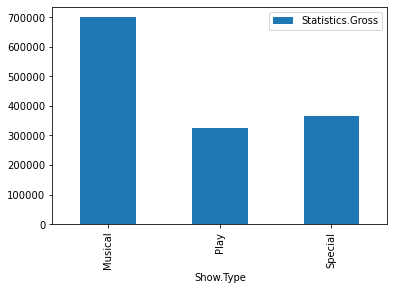

In [13]:
w = broadway_df.groupby('Show.Type')[['Statistics.Gross']].mean()
w.plot(kind = 'bar') 
# bar graph which shows the average of Statistics Gross of the three different show types in Broadway 
# 'Statistics Gross' = how much the show made in total across the entire week. 

### Hospitals Dataset

In [14]:
#Hospitals
sc_df = corgis('Hospitals')
sc_df.columns
sc_df.head()


,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
0,Southeast Alabama Medical Center,Dothan,AL,Government,2,Below,Above,Below,Below,Same,...,Average,17041,Average,Average,18281,Average,Average,25812,Average,Higher
1,Marshall Medical Center South,Boaz,AL,Government,1,Below,Below,Below,Same,Above,...,Average,15819,Worse,Average,15614,Worse,Lower,22747,Average,Average
2,Eliza Coffee Memorial Hospital,Florence,AL,Government,3,Below,Above,Above,Below,Same,...,Average,16334,Average,Average,17371,Average,Average,24491,Average,Higher
3,Mizell Memorial Hospital,Opp,AL,Private,1,Same,Same,Below,Below,Below,...,Unknown,14541,Average,Lower,15226,Worse,Lower,23472,Average,Average
4,Crenshaw Community Hospital,Luverne,AL,Proprietary,4,Same,None,Above,None,Same,...,Unknown,13767,Average,Lower,14341,Average,Lower,0,Unknown,Unknown


<AxesSubplot:xlabel='Rating.Overall'>

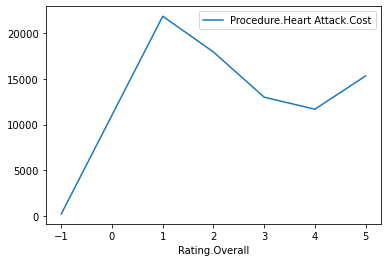

In [15]:
sc_df.groupby('Rating.Overall')[['Procedure.Heart Attack.Cost']].mean().plot(kind = 'line')
#line plot showing the change in cost of procedure of heart attack across hospitals of different overall ratings  

### Earthquakes Dataset

In [16]:
eq_df = corgis('Earthquakes')
eq_df.columns

Index(['id', 'impact.gap', 'impact.magnitude', 'impact.significance',
       'location.depth', 'location.distance', 'location.full',
       'location.latitude', 'location.longitude', 'location.name', 'time.day',
       'time.epoch', 'time.full', 'time.hour', 'time.minute', 'time.month',
       'time.second', 'time.year'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

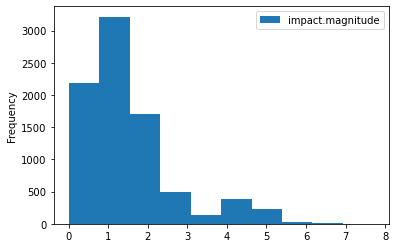

In [17]:
earthquakes = pd.DataFrame ({'impact.magnitude' : eq_df['impact.magnitude']})
earthquakes.plot(kind = 'hist') 
#histogram showing the frequency of earthquakes for each magnitude level